In [2]:
import numpy as np
import glob

import rioxarray as rio
import xarray as xr

from natsort import natsorted 
import matplotlib.pyplot as plt

In [3]:
# the tiff mask send by Gunther
f_mask_Gunther='/work/hpc/users/kerrie/UN_FAO/data/from_Gunther/AgERA5mask_5m.tif'

### get mask sent from Gunther on 16 May 2023

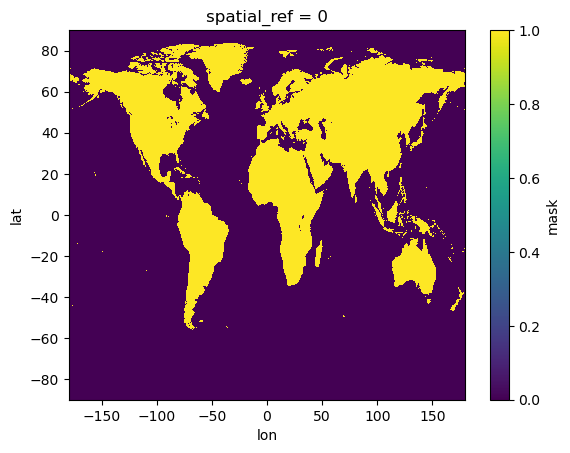

In [13]:
mask_gunt=xr.open_dataset(f_mask_Gunther,engine='rasterio').squeeze()['band_data']
del mask_gunt.coords['band']
mask_gunt=mask_gunt.rename({'x':'lon','y':'lat'})
mask_gunt=mask_gunt.rename('mask')
mask_gunt.plot()

In [18]:
print('n data grids =',mask_gunt.data.sum())

n data grids = 2268708.0


### get radiation data for Jan 1980

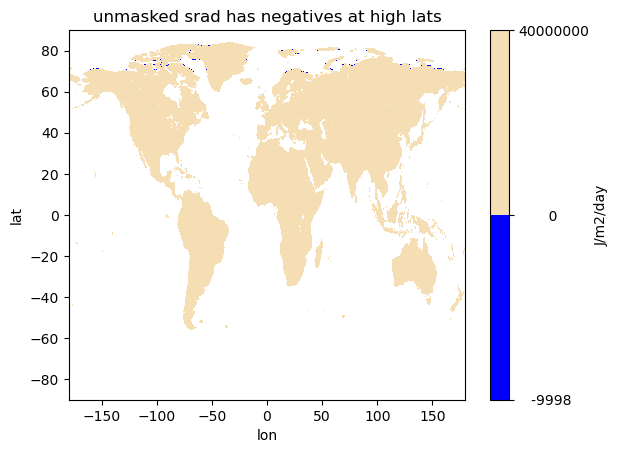

In [37]:
# get data
f=natsorted(glob.glob('/work/hpc/users/kerrie/UN_FAO/data/orig/DataDownload03152023/Climate/monthly/Srad_AgERA5_Hist_1980_01_5m.rst'))[0]
srad=xr.open_dataset(f,engine='rasterio').squeeze()['band_data']

# clean up metadata
del srad.coords['band']
srad=srad.rename({'x':'lon','y':'lat'})
srad=srad.rename('srad')

# eliminate antarctica
srad=srad.where(srad.lat>-60.)  

# plot
srad.plot(colors=['blue','wheat'],levels=[-9998,0,4E7],cbar_kwargs={'label':'J/m2/day','format':'%8i'})
plt.title('unmasked srad has negatives at high lats')
plt.show()

In [38]:
# get info on the negative values
nneg=xr.where(srad.data<0,1,0).sum()
vals=np.unique(srad.where(srad<0))

print('data range after fill value -9999 has been converted to nan: ',srad.min().data,srad.max().data)
print('number of grids with negative values',nneg)
print( 'number of different negative values:', len(vals)-1 )
vals

data range after fill value -9999 has been converted to nan:  -9908.016 36083732.0
number of grids with negative values 4073
number of different negative values: 4041


array([-9.9080156e+03, -9.8819746e+03, -9.8632939e+03, ...,
       -6.0952692e+00, -1.7454834e+00,            nan], dtype=float32)

### apply gunther mask

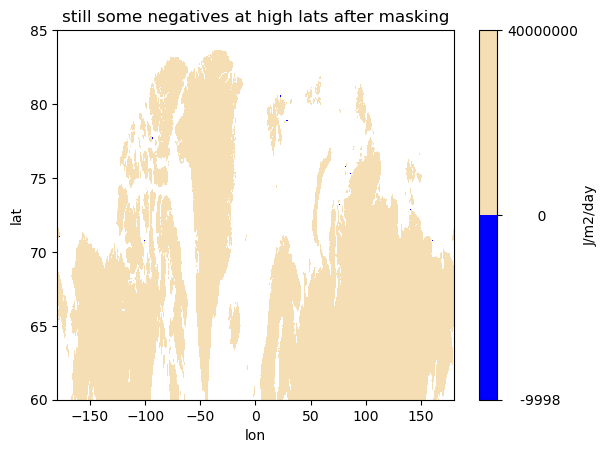

In [26]:
# apply mask
data_gmasked=xr.where(mask_gunt>0,srad,np.nan)#['mask']

# plot
data_gmasked.sel(lat=slice(85,60)).plot(colors=['blue','wheat'],levels=[-9998,0,4E7],cbar_kwargs={'label':'J/m2/day','format':'%8i'})
plt.title('still some negatives at high lats after masking')
plt.show()

In [36]:
# get info on the negative values
nneg=xr.where(data_gmasked.data<0,1,0).sum()
vals=np.unique(data_gmasked.where(data_gmasked<0))

print('data range after fill value -9999 has been converted to nan: ',data_gmasked.min().data,data_gmasked.max().data)
print('number of grids with negative values',nneg)
print( 'number of different negative values:', len(vals)-1 )
vals

data range after fill value -9999 has been converted to nan:  -9613.712 36083732.0
number of grids with negative values 91
number of different negative values: 91


array([-9613.712  , -9152.226  , -9122.211  , -9013.834  , -8857.448  ,
       -8506.232  , -8362.183  , -8340.874  , -7523.934  , -7490.644  ,
       -7483.687  , -7415.753  , -7381.2744 , -7340.6943 , -7304.7617 ,
       -7303.5825 , -7302.481  , -7296.2856 , -7240.6953 , -7218.3154 ,
       -7134.4053 , -6971.848  , -6958.844  , -6942.437  , -6884.9536 ,
       -6790.7017 , -6675.174  , -6665.744  , -6571.219  , -6559.8325 ,
       -6531.16   , -6503.68   , -6499.527  , -6460.089  , -6459.5615 ,
       -6420.9263 , -6419.1006 , -6398.762  , -6388.579  , -6071.3022 ,
       -5983.264  , -5966.2715 , -5951.5605 , -5941.3467 , -5903.513  ,
       -5835.241  , -5781.864  , -5760.826  , -5736.5825 , -5675.9414 ,
       -5654.0684 , -5634.524  , -5583.911  , -5454.155  , -5268.238  ,
       -5233.7515 , -5073.4507 , -5070.962  , -4796.5215 , -4449.8125 ,
       -4409.5244 , -4285.9395 , -4279.1035 , -4102.5625 , -3968.9683 ,
       -3798.13   , -3748.0908 , -3739.6252 , -3697.1394 , -3530

#### There are still 91 grid cells at high lats after masking that are negative, with values ranging from -187.3 to -9613.7